In [1]:
import pandas as pd

In [2]:
txrn = pd.read_csv('Retail_Data_Transactions.csv')

In [3]:
txrn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [4]:
response = pd.read_csv('Retail_Data_Response.csv')

In [5]:
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [6]:
df = txrn.merge(response, on='customer_id', how='left')

In [7]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [8]:
df.dtypes
df.shape
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [9]:
df.describe()


,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [10]:
#missing values
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [11]:
df = df.dropna()


In [12]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [13]:
#change the datatypes
df['trans_date'] = pd.to_datetime(df['trans_date'], format='%d-%b-%y')



C:\Users\abhiy\AppData\Local\Temp\ipykernel_17148\3771647694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date'] = pd.to_datetime(df['trans_date'], format='%d-%b-%y')


In [20]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1.0
1,CS4768,2015-03-15,39,1.0
2,CS2122,2013-02-26,52,0.0
3,CS1217,2011-11-16,99,0.0
4,CS1850,2013-11-20,78,0.0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0
124996,CS7232,2014-08-19,38,0.0
124997,CS8731,2014-11-28,42,0.0
124998,CS8133,2013-12-14,13,0.0


In [27]:
set(df['response'])

{0.0, 1.0}

In [28]:
#changing datatype
df.loc[:, 'response'] = df['response'].astype('int64')


In [30]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response              float64
dtype: object

In [32]:
# Check for outliers using Z-score
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df['tran_amount']))

# Define a threshold
threshold = 3

# Identify outliers
outliers = z_scores > threshold

# Print the outliers
print(df['tran_amount'][outliers])


Series([], Name: tran_amount, dtype: int64)


In [34]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df['response']))

# Define a threshold
threshold = 3

# Identify outliers
outliers = z_scores > threshold

# Print the outliers
print(df['response'][outliers])

Series([], Name: response, dtype: float64)


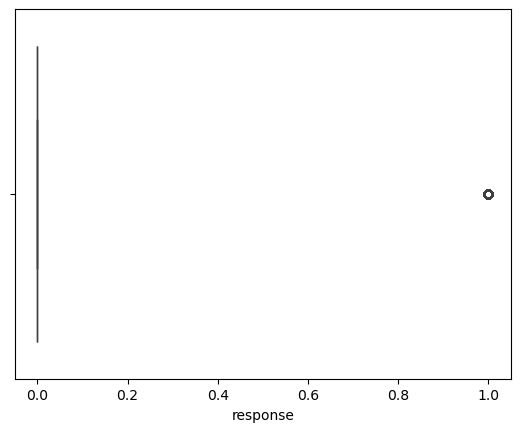

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['response'])
plt.show()

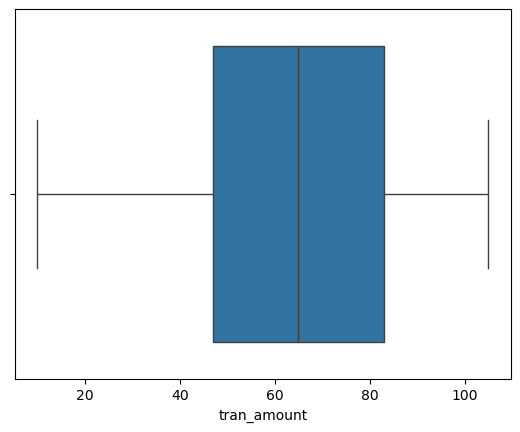

In [40]:
sns.boxplot(x=df['tran_amount'])
plt.show()

In [41]:
# creating new columns
df.loc[:, 'month'] = df['trans_date'].dt.month


C:\Users\abhiy\AppData\Local\Temp\ipykernel_17148\1314710297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'month'] = df['trans_date'].dt.month


In [43]:
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1.0,2
1,CS4768,2015-03-15,39,1.0,3
2,CS2122,2013-02-26,52,0.0,2
3,CS1217,2011-11-16,99,0.0,11
4,CS1850,2013-11-20,78,0.0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0,6
124996,CS7232,2014-08-19,38,0.0,8
124997,CS8731,2014-11-28,42,0.0,11
124998,CS8133,2013-12-14,13,0.0,12


In [47]:
# which 3 months ahve had the highest transacctions amount
monthly_sales= df.groupby('month')['tran_amount'].sum()
monthly_sales = monthly_sales.sort_values(ascending=False).reset_index()
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089
3,7,717011
4,12,709795
5,11,698024
6,6,697014
7,9,694201
8,2,645028
9,3,636475


In [49]:
#customers having highest numbers of orders
customer_counts= df['customer_id'].value_counts().reset_index()
customer_counts



,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35
...,...,...
6879,CS8559,4
6880,CS7224,4
6881,CS7716,4
6882,CS8504,4


In [51]:
#sort 
top5_cus = customer_counts.sort_values(by='count',ascending=False).head(5)
top5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

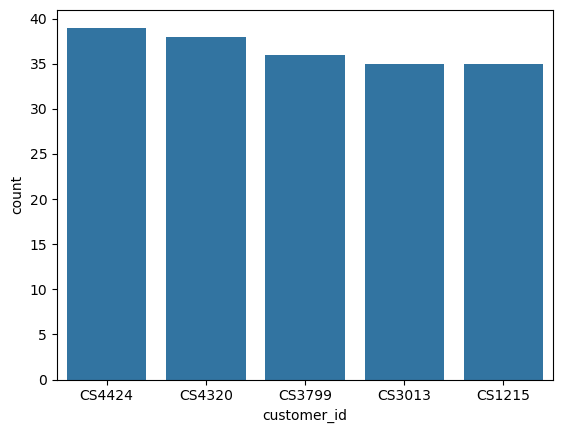

In [53]:
sns.barplot(x='customer_id',y='count',data=top5_cus)

In [55]:
#customers having highest values of orders
customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

,customer_id,tran_amount
0,CS1112,1012
1,CS1113,1490
2,CS1114,1432
3,CS1115,1659
4,CS1116,857
...,...,...
6879,CS8996,582
6880,CS8997,543
6881,CS8998,624
6882,CS8999,383


In [57]:
#sort 
top5_sales = customer_sales.sort_values(by='tran_amount',ascending=False).head(5)
top5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

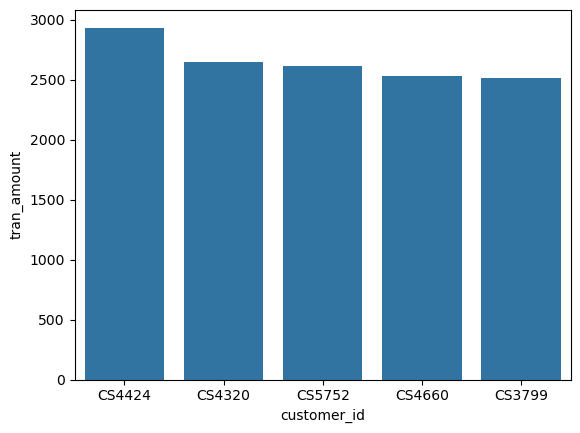

In [59]:
sns.barplot(x='customer_id',y='tran_amount',data=top5_sales)

In [61]:
#time series analysis
import matplotlib.dates as mdates

In [63]:
df['month_year']= df['trans_date'].dt.to_period('M')

C:\Users\abhiy\AppData\Local\Temp\ipykernel_17148\1852990829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']= df['trans_date'].dt.to_period('M')


In [65]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1.0,2,2013-02
1,CS4768,2015-03-15,39,1.0,3,2015-03
2,CS2122,2013-02-26,52,0.0,2,2013-02
3,CS1217,2011-11-16,99,0.0,11,2011-11
4,CS1850,2013-11-20,78,0.0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0,6,2011-06
124996,CS7232,2014-08-19,38,0.0,8,2014-08
124997,CS8731,2014-11-28,42,0.0,11,2014-11
124998,CS8133,2013-12-14,13,0.0,12,2013-12


In [67]:
monthly_sales = df.groupby('month_year')['tran_amount'].sum()
type(monthly_sales.index)

pandas.core.indexes.period.PeriodIndex

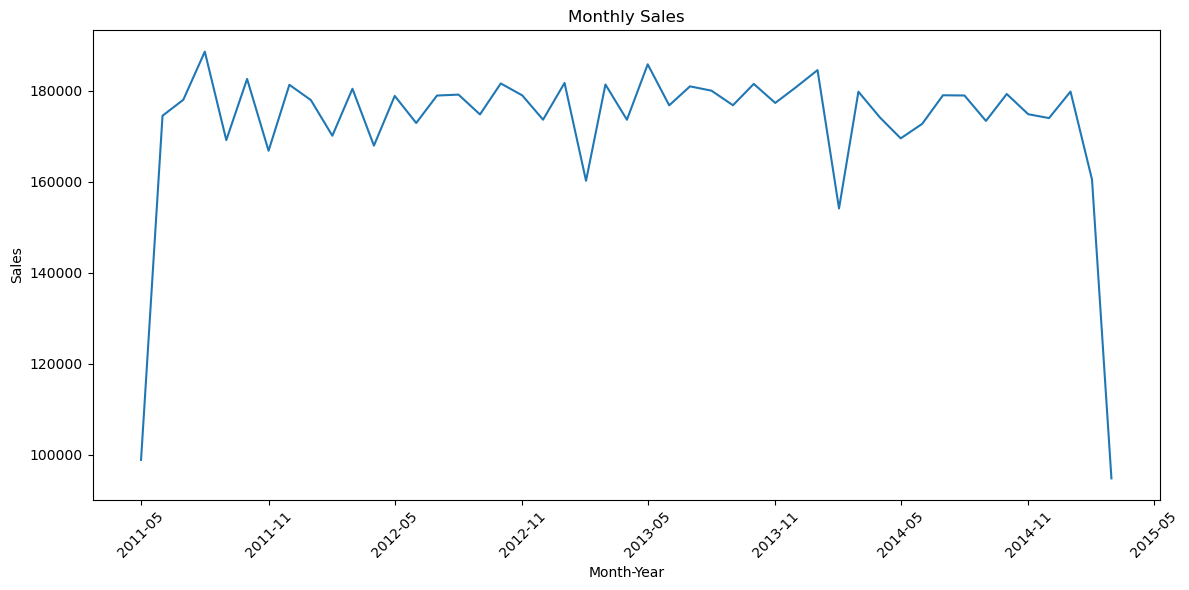

In [69]:
monthly_sales.index = monthly_sales.index.to_timestamp()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
### Cohort Segmentation

In [73]:
# recency
recency= df.groupby('customer_id')['trans_date'].max()

#frequency
frequency= df.groupby('customer_id')['trans_date'].count()

#monetary
monetary= df.groupby('customer_id')['tran_amount'].sum()

#combine
rfm= pd.DataFrame({'recency':recency, 'frequency': frequency, 'monetary':monetary})

In [75]:
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [77]:
#customer segmentation
def segment_customer(row):
    if row['recency'].year >= 2012 and row['frequency'] >= 15 and row['monetary'] > 1000:
        return 'P0'
    elif 2011 <= row['recency'].year < 2012 and 10 < row['frequency'] < 15 and 500 <= row['monetary'] <= 1000:
        return 'P1'
    else:
        return 'P2'

rfm['segment'] = rfm.apply(segment_customer, axis=1)


In [79]:
rfm

,recency,frequency,monetary,segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


In [81]:
## churn analysis

<Axes: xlabel='response'>

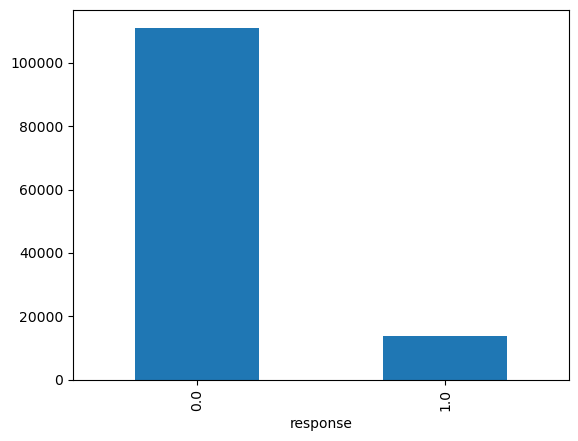

In [83]:
# find the numbers of churned and active customers
churn_counts = df['response'].value_counts()
churn_counts.plot(kind='bar')

In [85]:
## analyszing the top customers

<Axes: xlabel='month_year'>

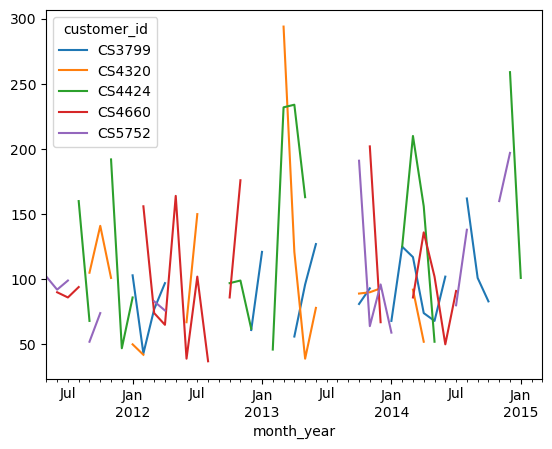

In [87]:
top_5_cus = monetary.sort_values(ascending=False).head(5).index
top_customer_df=df[df['customer_id'].isin(top_5_cus)]
top_customer_sales = top_customer_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')


In [92]:
df.to_csv('MainData.csv', index=False)


In [96]:
rfm.to_csv('AddAnlys.csv', index=False)


In [87]:
rfm.dtypes

recency      datetime64[ns]
frequency             int64
monetary              int64
segment              object
dtype: object

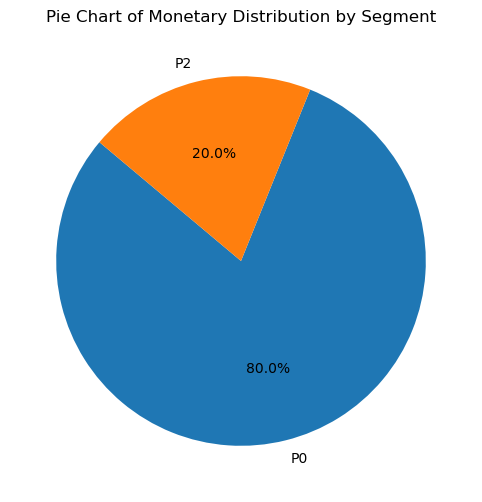

In [93]:
# Group by 'segment' and sum the 'monetary' values
segment_monetary = rfm.groupby('segment')['monetary'].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(segment_monetary, labels=segment_monetary.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Monetary Distribution by Segment')
plt.show()



In [91]:
rfm

,recency,frequency,monetary,segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


In [95]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1.0,2,2013-02
1,CS4768,2015-03-15,39,1.0,3,2015-03
2,CS2122,2013-02-26,52,0.0,2,2013-02
3,CS1217,2011-11-16,99,0.0,11,2011-11
4,CS1850,2013-11-20,78,0.0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0,6,2011-06
124996,CS7232,2014-08-19,38,0.0,8,2014-08
124997,CS8731,2014-11-28,42,0.0,11,2014-11
124998,CS8133,2013-12-14,13,0.0,12,2013-12


In [99]:
df.dtypes


customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response              float64
month                   int32
month_year          period[M]
dtype: object

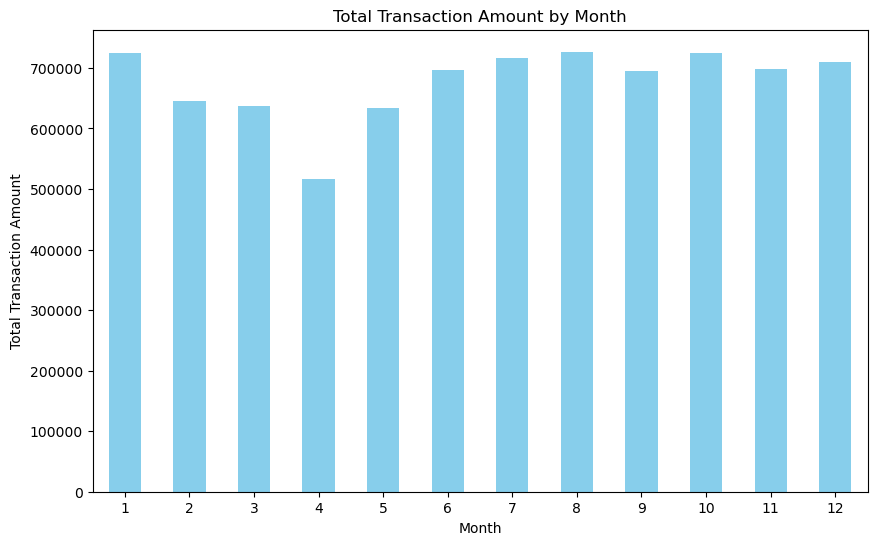

In [101]:
# Group by 'month' and sum the 'tran_amount'
month_amount = df.groupby('month')['tran_amount'].sum()

# Create a bar graph
plt.figure(figsize=(10, 6))
month_amount.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Total Transaction Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=0)  # Ensure the month labels are horizontal

# Display the plot
plt.show()
